KNN 

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [8]:
df = pd.read_csv('pizza_sales.csv')

In [9]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


Predict pizza category on the basis on pizza size and unit sales

In [10]:
df['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [12]:
pizza_size_map = {
    'S' : 0,
    'M' : 1,
    'L' : 2,
    'XL' : 3,
    'XXL' : 4
}

df['pizza_size_id'] = df['pizza_size'].map(pizza_size_map)

In [25]:
df['unit_price']

0        13.25
1        16.00
2        18.50
3        20.75
4        16.00
         ...  
48615    16.75
48616    17.95
48617    12.00
48618    20.25
48619    12.75
Name: unit_price, Length: 48620, dtype: float64

In [15]:
# we can use label encoder in target , but we should not do in feature
df['pizza_category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [22]:
le = LabelEncoder()

In [23]:
df['pizza_category_id'] = le.fit_transform(df['pizza_category'])

In [24]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,pizza_size_id,pizza_category_id
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2,3
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2,2
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31/12/2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,1,0
48616,48617,21348,four_cheese_l,1,31/12/2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,2,3
48617,48618,21348,napolitana_s,1,31/12/2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,0,1
48618,48619,21349,mexicana_l,1,31/12/2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2,3


In [29]:
#  feature and target
feature = ['unit_price', 'pizza_size_id']
target = 'pizza_category_id'

In [30]:
X = df[feature]
Y = df[target]

In [31]:
X_train , X_test , Y_train , Y_test = train_test_split (
    X,Y, test_size = 0.2, random_state = 42
)

In [ ]:
scaler = StandardScaler() #  (xi - mean )/ sd

In [ ]:
#(xi - mean )/ sd
X_train_scale = scaler.fit_transform(X_train) # When we ise fit transform , it calculates values based on formula
X_train_scale

array([[-1.03778502, -1.32550757],
       [-1.65955168, -1.32550757],
       [-0.13967761, -0.13747747],
       ...,
       [-1.1068702 , -1.32550757],
       [ 0.06757794, -0.13747747],
       [ 1.1729409 ,  1.05055264]])

In [ ]:
X_test_scale = scaler.transform(X_test) #When we transform , these all test values are dervied being based on values of X_Train_Scale
X_test_scale

array([[-1.08678827, -0.12944061],
       [-0.88037561, -0.12944061],
       [-0.05472497, -0.12944061],
       ...,
       [ 1.18375099,  1.05799386],
       [ 0.41314373,  1.05799386],
       [ 1.18375099,  1.05799386]])

In [51]:
error_rate  = []
k_range = range(1,21)

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(X_train_scale,Y_train)
    Y_pred = knn.predict(X_test_scale)
    error_rate.append(np.mean(Y_pred != Y_test.values))

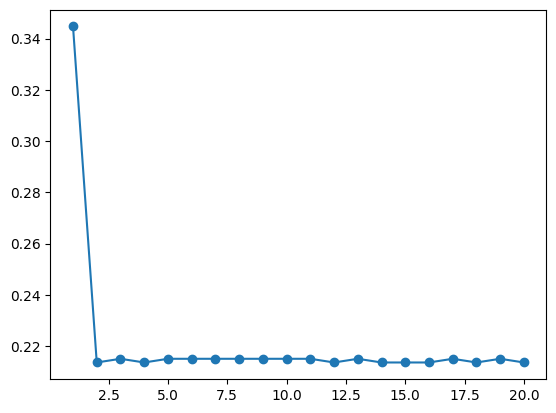

In [54]:
plt.plot(k_range , error_rate, marker='o')